# UNITAC
## 01: Launch

### 1.1 Import Modules

In this chapter, all the needed modules and packages are installed to be ready for the analysis of the chat.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import docx
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
import spacy
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px
from copy import deepcopy
import csv

### 1.2 Functions

In [3]:
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

In [4]:
def tokenized_word(filename):
    return word_tokenize(filename)

In [5]:
def tag(filename, language, pipeline):
    '''
    language two letters like en, de, or fr
    pipeline: trf (accuracy) or sm (speed)
    '''
    nlp = spacy.load(str(language)+'_core_web_'+pipeline)
    doc = nlp(filename)
    return ' '.join('{word}/{tag}'.format(word=t.orth_, tag=t.pos_) for t in doc)

In [6]:
def tokenized_sentence(filename):
    return sent_tokenize(filename)

In [7]:
def remove_Stopwords(filename, language):
    filtered_words=[]
    stop_words=list(stopwords.words(language))
    stop_words2=[",", ".", ":", "-", "--", "?", "!", "i", "(",")", "[","]"]
    stop_words_cust=stop_words+stop_words2
    for w in filename:
        if w.lower() not in stop_words_cust:
            filtered_words.append(w)
    return filtered_words

In [8]:
def most_common_words(filename, number):
    fdist = FreqDist(filename)
    return fdist.most_common(number)

In [9]:
def most_common_plot(filename, number):
    fdist = FreqDist(filename)
    plot=fdist.plot(number,title='Frequency distribution')
    return plot

In [10]:
def nouns(filename):
    nlp = spacy.load('en_core_web_sm')
    nouns=[]
    for w in filename:
        if "/NOUN" in w:
            nouns.append(w)
    string_nouns=' '.join(nouns).replace("/NOUN","")
    
    for w in string_nouns:
        doc = nlp(string_nouns)
        res = ' '.join([x.lemma_ for x in doc])

    return tokenized_word(res)

In [11]:
def prop_nouns(filename):
    nlp = spacy.load('en_core_web_sm')
    nouns=[]
    for w in filename:
        if "/PROPN" in w:
            nouns.append(w)
    string_nouns=' '.join(nouns).replace("/PROPN","")
    
    for w in string_nouns:
        doc = nlp(string_nouns)
        res = ' '.join([x.lemma_ for x in doc])

    return tokenized_word(res)

In [12]:
def wordcloud(filename):
    wc = WordCloud(background_color='white')

    nouns_string=' '.join(filename)

    wc.generate(nouns_string)

    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')

In [13]:
def nouns_clean(filename):
    nouns_clean = []
    for w in filename:
        if w in ["/",'PM', 'presentation', 'thanks', 'Thanks', 'Congratulations',
                 'name', 'dos', 'santos', '//links-project.eu', 'DivineMAC',
                 'systemsteam', 'linkedin', '-', 'thank', 'datum', 'event', 'do', 'launch',
                 'project.eu/', '//links', 'santo', 'pm']:
            continue
        nouns_clean.append(w)
        
    return nouns_clean

### 1.3 Load the data

In [36]:
# Create separate .docx files
filename = "Project Proposal Survey.csv"
projects_list = []
result_list = []
with open(filename, "r", newline = "") as csvfile:
    datareader = csv.reader(csvfile)
    for row in datareader:
        for cell in row:
            result_list.append(cell)
        projects_list.append(row)
index = 1

for project in projects_list:
    mydoc = docx.Document()
    mydoc.add_paragraph(project)
    mydoc.save(f"/Users/ferris/SwitchDrive/SyncVM/HCU/Proposals/SeparateDocx/Project_{index}.docx")
    index += 1

In [15]:
# Loop through a listed proposals and create analysis
a_proposals = ["5", "7", "9", "11", "14", "15", "19", "24", "27", "28"]

for e in a_proposals:
    filepath = f"/Users/ferris/SwitchDrive/SyncVM/HCU/Proposals/SeparateDocx/Project_{e}.docx"

    launch=getText(filepath)
    launch_tok = tokenized_word(launch)
    launch_filtered = remove_Stopwords(launch_tok, 'english')
    launch_tagged = tag(launch, 'en', 'sm')
    launch_tagged_tok = tokenized_word(launch_tagged)
    launch_nouns=nouns(launch_tagged_tok)
    launch_nouns_clean = nouns_clean(launch_nouns)
    df = pd.DataFrame({'word':launch_nouns_clean}).value_counts().to_frame(name='count')
    df.to_csv(f"Word Count Proposal_{e}.csv")

In [ ]:
filepath = f"/Users/ferris/SwitchDrive/SyncVM/HCU/Proposals/SeparateDocx/Project_5.docx"
launch=getText(filepath)
launch_tok = tokenized_word(launch)
launch_filtered = remove_Stopwords(launch_tok, 'english')
launch_tagged = tag(launch, 'en', 'sm')
launch_tagged_tok = tokenized_word(launch_tagged)
launch_nouns = nouns(launch_tagged_tok)
launch_nouns_clean = nouns_clean(launch_nouns)
df = pd.DataFrame({'word':launch_nouns_clean}).value_counts().to_frame(name='count')
df.to_csv(f"Word Count Proposal_{e}.csv")

In [33]:
filepath=("/Users/ferris/SwitchDrive/SyncVM/HCU/Proposals/Separate_Docx/Project_5.docx")
launch=getText(filepath)

### 1.4 Prepare the data

#### 1.4.1 Tokenize the words

To access single words, it was necessary to split the text into single words. For this purpose, the function  "tokenized_word()" defined in chapter 1.2 was used.

In [38]:
launch_tok = tokenized_word(filepath)
print(launch_tok)

['/Users/ferris/SwitchDrive/SyncVM/HCU/Proposals/Separate_Docx/Project_5.docx']


#### 1.4.2 Filter out Stopwords

It was crucial to filter out the meaningless words in order to identify the key words.

In [50]:
launch_filtered = remove_Stopwords(launch_tok, 'english')

#### 1.4.3 Tag the words

In [49]:
launch_tagged = tag(launch, 'en', 'sm')

#### 1.4.4 Tokenize the tagged words

This step is the same as step 1.4.1, but here the tagged words were tokenized using the same function as before. This made it possible to access single words of the tagged text.

In [24]:
launch_tagged_tok = tokenized_word(launch_tagged)

#### 1.4.5 Filter out and lemmatize the nouns of the tokenized & tagged words

In this step, the nouns were filtered out and "normalized" through lemmatization. This means, all the nouns were reduced to their basic grammatical form. This step was very important to have a clean data basis with the nouns used, so that it was possible to identify the real number of how much a noun has been used.

In [25]:
launch_nouns = nouns(launch_tagged_tok)

In [30]:
launch_nouns_backup = deepcopy(launch_nouns)

In [31]:
launch_nouns_df = pd.DataFrame({'c1':launch_nouns})
launch_nouns_df.to_csv('proposal01_nouns.csv')

As already mentioned before, the above generated data is stored in 6 different text files in the next steps. This step can be skipped if the text files are already existing.

In [32]:
launch_nouns_file = open("proposal01_nouns_file.txt","w")
launch_nouns_file.write(",".join(launch_nouns))
launch_nouns_file.close()

The below step loads the data of the generated text files and store it for every of the 6 interviews in the same variable as the first step in this subchapter. It can be skipped if the first step was executed, because this step overwrites the variables already generated in the first step.

In [33]:
launch_nouns=''
fobj = open("proposal01_nouns_file.txt")
for line in fobj:
    launch_nouns+=line.rstrip()
fobj.close()
launch_nouns=tokenized_word(launch_nouns.replace(","," "))

### 1.5 Analysis of the data

#### 1.5.1 Identify Key Words

In this chapter the frequency of words in the project proposals is being analyzed to identify the key words which were often used by the applicants. . 

To identify the keywords, it was necessary to prepare the data in two steps: First, the whole proposal was split into tokens of words, to be able to access every single word of the text (see chapter 1.4.2). Then, the stopwords were filtered out, so that only important words occured in the analysis (see chapter 1.4.4).

To visualize the frequency of the important words in the different interviews, two plots are used per proposal. One is showing a so called wordcloud, in which the most frequently used words are displayed in a size according to their frequency of occurence in the proposal. The other plot is showing the frequency distribution of the most used words. 

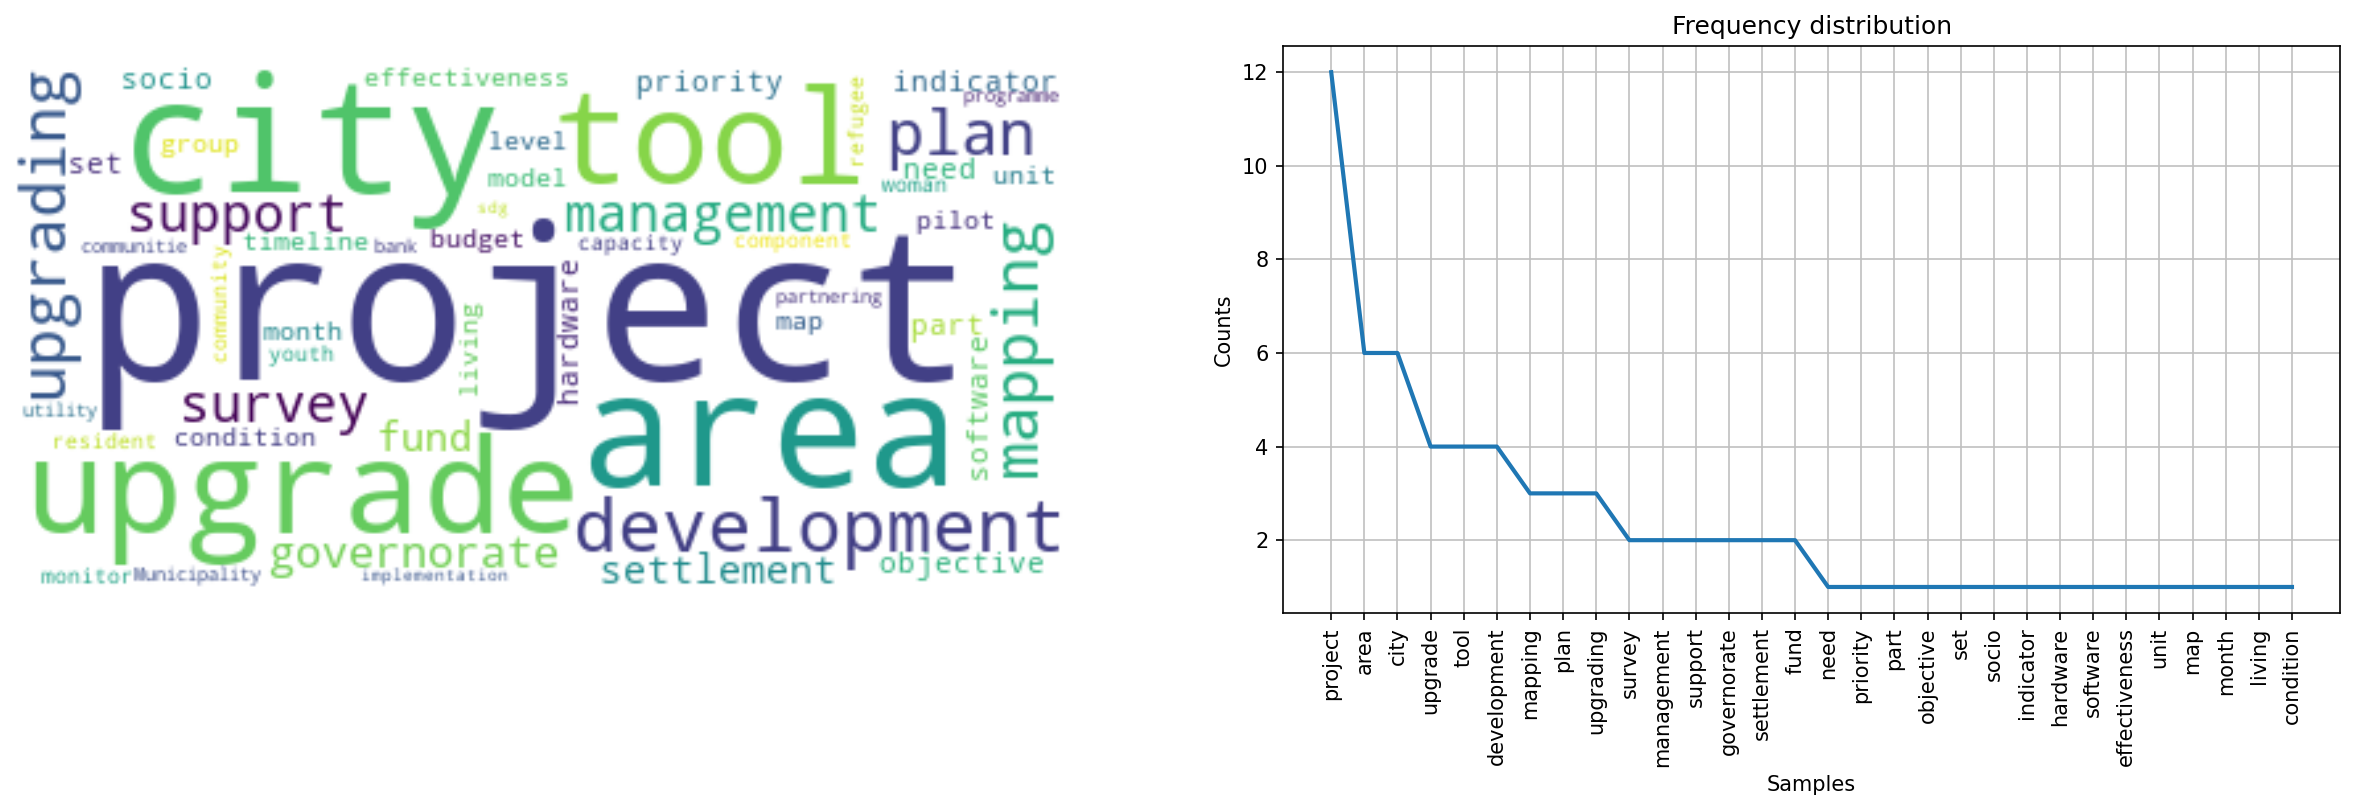

In [34]:
launch_nouns_clean = nouns_clean(launch_nouns)

fig=plt.figure(figsize=(20,5), dpi= 150, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
wordcloud(launch_nouns_clean)
plt.subplot(1, 2, 2)
most_common_plot(launch_nouns_clean,30)
plt.show()

In [35]:
df_values=pd.DataFrame({'word':launch_nouns_clean}).value_counts()[0:50]
print(df_values[:])

word          
project           12
area               6
city               6
upgrade            4
tool               4
development        4
plan               3
upgrading          3
mapping            3
governorate        2
management         2
settlement         2
support            2
fund               2
survey             2
pilot              1
software           1
socio              1
set                1
sdg                1
timeline           1
resident           1
unit               1
refugee            1
utility            1
programme          1
woman              1
priority           1
Municipality       1
need               1
partnering         1
part               1
bank               1
budget             1
capacity           1
communitie         1
community          1
component          1
condition          1
effectiveness      1
group              1
hardware           1
implementation     1
indicator          1
level              1
living             1
map                

#### 1.5.2 Identify Locations

In [ ]:
nlp = spacy.load('en_core_web_sm')
doc= nlp(launch)
ents_list_gpe = []

l2 = []
for ent in doc.ents:
    if ent.label_ == 'GPE':
        ents_list_gpe.append(ent.text)
        ents_list_gpe = [e for e in ents_list_gpe if e not in l2]

In [ ]:
fig=plt.figure(figsize=(12,4), dpi= 500, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
wordcloud(ents_list_gpe)
plt.subplot(1, 2, 2)
most_common_plot(ents_list_gpe,30)
plt.show()

In [ ]:
df_gpe=pd.DataFrame({'c1':ents_list_gpe})
df_gpe_values = df_gpe.value_counts()
print(df_gpe_values)